## Overview
In data analysis, we might need to split the dataset into groups/pivot tables and apply a function to each group, whether it is an aggrgation or transformation operation. For this purpose, pandas has some flexible built-in functionalities.

## GroupBy mechanics
split-apply-combine process

First, the data contained in a pandas object is spit into groups using one or more keys. The pandas object can be grouped on its rows(axis=0) or its columns(axis=1).

Next, a function is applied to each of the groups, producing a new value.

Finally, the results of that is combined into a result object.

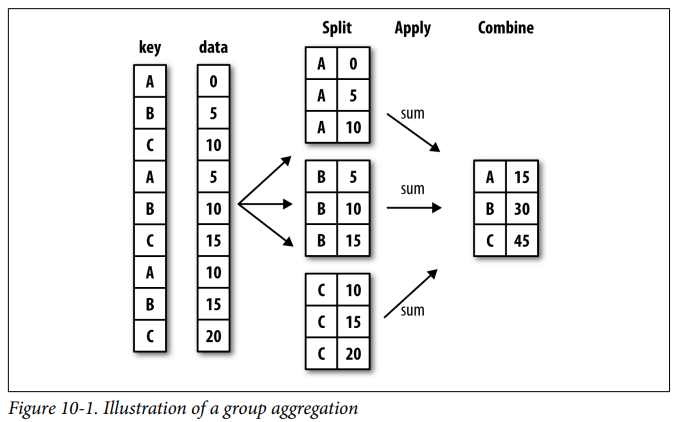

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.614096,-1.191201
1,a,two,-0.014992,0.489264
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057
4,a,one,-0.260908,-2.175065


Suppose we want to compute the mean of data1 columns using the labels from key1

In [7]:
grouped = df['data1'].groupby(df['key1'])
grouped

As we can see the returned object is a 'groupby' object. This object has all the information required to appy some operation to each of the groups. Here, we want to apply the mean operation.

In [8]:
grouped.mean()

key1
a    0.446065
b   -0.885987
Name: data1, dtype: float64

We can also pass an array of keys to be  grouped by.

In [10]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.676594
      two    -0.014992
b     one    -1.300789
      two    -0.471185
Name: data1, dtype: float64

In [11]:
means.unstack()

key2,one,two
key1,,
a,0.676594,-0.014992
b,-1.300789,-0.471185


The group keys could also be just arrays if they are the right lenght.

In [15]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2005, 2006, 2007])
df['data1'].groupby([states, years]).mean()

California  2005   -0.657890
Ohio        2005    1.614096
            2006   -0.471185
            2007   -0.260908
Name: data1, dtype: float64

We can also just pass the the column names as the group keys

In [16]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.446065,-0.959001
b,-0.885987,1.040753


In [17]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.676594 -1.683133
     two  -0.014992  0.489264
b    one  -1.300789  1.191449
     two  -0.471185  0.890057

Non-numeric data columns are said to be nuisance columns which are excluded. All numeric columns are aggregated by default.

The size() used to return the size of each group.

In [18]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### Iterating Over Groups
The groupby object allows for iteration over it, generating a 2-tuple contianing the group name followed by the group data.

In [20]:
for name, group in df.groupby('key1'):
    print("The group name is: ", name)
    print(group)

The group name is:  a
  key1 key2     data1     data2
0    a  one  1.614096 -1.191201
1    a  two -0.014992  0.489264
4    a  one -0.260908 -2.175065
The group name is:  b
  key1 key2     data1     data2
2    b  one -1.300789  1.191449
3    b  two -0.471185  0.890057


In case of multiple keys, the first element is a tuple of key values.

In [21]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  1.614096 -1.191201
4    a  one -0.260908 -2.175065
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.014992  0.489264
('b', 'one')
  key1 key2     data1     data2
2    b  one -1.300789  1.191449
('b', 'two')
  key1 key2     data1     data2
3    b  two -0.471185  0.890057


Another useful way is computing a dictionary of the data.

In [22]:
pieces = list(df.groupby('key1'))
pieces

[('a',
    key1 key2     data1     data2
  0    a  one  1.614096 -1.191201
  1    a  two -0.014992  0.489264
  4    a  one -0.260908 -2.175065),
 ('b',
    key1 key2     data1     data2
  2    b  one -1.300789  1.191449
  3    b  two -0.471185  0.890057)]

In [23]:
pieces = dict(pieces)
pieces['b']

,key1,key2,data1,data2
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057


We are grouping the columns by dtype below.

In [24]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [25]:
grouped = df.groupby(df.dtypes, axis=1)
for dtype, group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  1.614096 -1.191201
1 -0.014992  0.489264
2 -1.300789  1.191449
3 -0.471185  0.890057
4 -0.260908 -2.175065
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


### Selecting a column or Subset of columns

In [ ]:
df.groupby('key1')['data1']
df.groupby('key2')[['data2']]

The above is a better form of the one below;

In [ ]:
df['data1'].groupby(df['key1'])
df[['data2']].groupby(df['key1'])

For example to compute the mean values for the data2 column,

In [31]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -1.683133
     two   0.489264
b    one   1.191449
     two   0.890057

The object returned above is a grouped dataframe if a list or array is passed.

In [32]:
df.groupby(['key1', 'key2'])['data2'].mean()

key1  key2
a     one    -1.683133
      two     0.489264
b     one     1.191449
      two     0.890057
Name: data2, dtype: float64

Note the significant diffence between the above two. If a scalar is passed the returned object is a grouped Series. 

### Grouping with Dicts and Series

In [36]:
people = pd.DataFrame(np.random.randn(5, 5),
                     columns=['a', 'b', 'c', 'd', 'e'],
                     index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, [1, 2]] = np.nan # we are adding some null values
people

,a,b,c,d,e
Joe,0.886064,0.191012,1.813110,-0.471120,-0.689935
Steve,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
Wes,-0.492796,NaN,NaN,0.923054,1.279802
Jim,-0.357104,1.462357,0.094828,-1.560865,-0.282344
Travis,0.201303,0.534155,-0.384957,-0.499509,0.050036


Suppose we have a group correspondance to map using,

In [39]:
mapping = {'a' : 'red', 'b': 'red', 'c' : 'blue',
          'd' : 'blue', 'e' : 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,1.341990,0.387140
Steve,-0.456013,-1.216680
Wes,0.923054,0.787006
Jim,-1.466037,0.822909
Travis,-0.884466,0.785495


Same functionality is there for a series also.

In [40]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [42]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### Grouping with Functions
This is a more generic way of grouping. The function passed as the group key will be called once per index value, with the return values being used as group names.

In [43]:
people

,a,b,c,d,e
Joe,0.886064,0.191012,1.813110,-0.471120,-0.689935
Steve,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
Wes,-0.492796,NaN,NaN,0.923054,1.279802
Jim,-0.357104,1.462357,0.094828,-1.560865,-0.282344
Travis,0.201303,0.534155,-0.384957,-0.499509,0.050036


In [44]:
people.groupby(len).sum()

,a,b,c,d,e
3,0.036164,1.653370,1.907938,-1.108931,0.307522
5,-1.343873,0.787150,-0.042913,-0.413099,-0.659957
6,0.201303,0.534155,-0.384957,-0.499509,0.050036


In the above, the len function finds the length of the names in the index columns and groups accordingly.

In [45]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.492796  0.191012  1.813110 -0.471120 -0.689935
  two -0.357104  1.462357  0.094828 -1.560865 -0.282344
5 one -1.343873  0.787150 -0.042913 -0.413099 -0.659957
6 two  0.201303  0.534155 -0.384957 -0.499509  0.050036

### Grouping by Index levels
We can aggregate using one of the levels of an axis index.

In [46]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]],
                                   names=['city', 'tenor'])
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

city         US                            JP          
tenor         1         3         5         1         3
0     -1.574640 -1.262758 -1.348474 -1.094183 -0.236348
1      0.441358 -2.582573 -1.034148  0.415254 -0.805937
2     -0.158002  2.001027 -0.128693 -0.473450 -0.811762
3      0.600171  0.297758  1.025176 -0.058206  0.624127

In [49]:
hier_df.groupby(level='city', axis=1).count()

city,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## Data Aggregation
Aggregations refer to any data transforamtions that produce scalar values from arrays.

We can use aggregations of our own or call any method that is defind on the object to be grouped.

In [50]:
df

,key1,key2,data1,data2
0,a,one,1.614096,-1.191201
1,a,two,-0.014992,0.489264
2,b,one,-1.300789,1.191449
3,b,two,-0.471185,0.890057
4,a,one,-0.260908,-2.175065


In [51]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.288278
b   -0.554145
Name: data1, dtype: float64

Creating our own aggregation functions;

In [52]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [56]:
grouped.agg(peak_to_peak)

C:\Users\Visakan\anaconda3\lib\site-packages\pandas\core\groupby\generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


,data1,data2
key1,,
a,1.875004,2.664329
b,0.829604,0.301392


In [57]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.446065  1.018990 -0.260908 -0.137950 -0.014992  0.799552   
b      2.0 -0.885987  0.586619 -1.300789 -1.093388 -0.885987 -0.678586   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.614096   3.0 -0.959001  1.347257 -2.175065 -1.683133 -1.191201   
b    -0.471185   2.0  1.040753  0.213116  0.890057  0.965405  1.040753   

                          
           75%       max  
key1                      
a    -0.350969  0.489264  
b     1.116101  1.191449

### Column-Wise and Multiple Function Application
Sometimes we may need to aggregate using a different function depending on the column or multiple functions at once.

In [2]:
tips = pd.read_csv('examples/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


First, we group the tips by day and smoker.

In [63]:
grouped = tips.groupby(['day', 'smoker'])
grouped.agg('count')

total_bill  tip  sex  time  size  tip_pct
day  smoker                                           
Fri  No               4    4    4     4     4        4
     Yes             15   15   15    15    15       15
Sat  No              45   45   45    45    45       45
     Yes             42   42   42    42    42       42
Sun  No              57   57   57    57    57       57
     Yes             19   19   19    19    19       19
Thur No              45   45   45    45    45       45
     Yes             17   17   17    17    17       17

In [65]:
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

Passing a list of functions, we get a Dataframe object as return unlike a Series object as seen above.

In [66]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

Instead of using the functions names like mean, std, etc... we can also give our own names in the format(name, function),

In [67]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [70]:
functions = ['count', 'mean', 'max']
result = grouped[['tip_pct', 'total_bill']].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [71]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [72]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

Suppose we want to apply potentially different functions to one or more columns, then we pass a dictionary;

In [73]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [74]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'], 'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

### Returning aggregated data without row indexes
So far, the aggregated data comes back with an index. This can be disabled by passing as_index=False.

In [75]:
tips.groupby(['day', 'smoker']).mean() # usual

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [76]:
tips.groupby(['day', 'smoker'], as_index=False).mean() # without grouping the index

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## Apply
An apply method splits the object being manipulated into pieces, invokes the passed function on each piece, then trie to concatenate the pieces together.

In [8]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [9]:
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [10]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

From the above, we can observe that the 'top' function is applied is called on each row group of the dataframe and are glued together using pandas.concat.

We can also pass our own arguments to the 'top' function;

In [11]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

The only requirement for the user defind function we pass in apply() is that it returns a pandas object. So, we use our creativity to write useful functions as long as it satisfies the above condition.

For another example consider this example below;

In [13]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [14]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

When we invoke describe() as a method what is basically happening is,

In [ ]:
f = lambda x: x.describe()
grouped.apply(f)

### Supressing the grouped keys
We can disable the hierarchical indexing of the grouped keys by passing, group_keys=False.

In [15]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


### Qauntile and Bucket Analysis
Slicing data up into buckets with bins of our choice or by using sample quantiles.

In [17]:
frame = pd.DataFrame({'data1' : np.random.rand(1000),
                     'data2' : np.random.rand(1000)})
frame.head()

,data1,data2
0,0.582172,0.945072
1,0.660302,0.393564
2,0.193827,0.686241
3,0.297804,0.005131
4,0.256706,0.832368


In [18]:
quartiles = pd.cut(frame.data1, 4) # cut - division into equal bins
quartiles[:10]

0         (0.5, 0.75]
1         (0.5, 0.75]
2    (0.00134, 0.251]
3        (0.251, 0.5]
4        (0.251, 0.5]
5    (0.00134, 0.251]
6       (0.75, 0.999]
7    (0.00134, 0.251]
8        (0.251, 0.5]
9         (0.5, 0.75]
Name: data1, dtype: category
Categories (4, interval[float64, right]): [(0.00134, 0.251] < (0.251, 0.5] < (0.5, 0.75] < (0.75, 0.999]]

The categorical object returned can be passed directly to groupby;

In [20]:
def get_stats(group):
    return {'min' : group.min(), 'max' : group.max(),
           'count' : group.count(), 'mean' : group.mean()}

In [23]:
grouped = frame.data2.groupby(quartiles).apply(get_stats)
grouped

data1                  
(0.00134, 0.251]  min        0.000862
                  max        0.994046
                  count    255.000000
                  mean       0.503952
(0.251, 0.5]      min        0.002573
                  max        0.998158
                  count    249.000000
                  mean       0.500019
(0.5, 0.75]       min        0.001390
                  max        0.998963
                  count    242.000000
                  mean       0.506068
(0.75, 0.999]     min        0.004381
                  max        0.996902
                  count    254.000000
                  mean       0.459275
Name: data2, dtype: float64

In [24]:
grouped.unstack()

,min,max,count,mean
data1,,,,
"(0.00134, 0.251]",0.000862,0.994046,255.0,0.503952
"(0.251, 0.5]",0.002573,0.998158,249.0,0.500019
"(0.5, 0.75]",0.001390,0.998963,242.0,0.506068
"(0.75, 0.999]",0.004381,0.996902,254.0,0.459275


In [28]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping).apply(get_stats)
grouped.unstack()

,min,max,count,mean
data1,,,,
0,0.008960,0.983074,100.0,0.502227
1,0.000862,0.994046,100.0,0.516358
2,0.003502,0.982623,100.0,0.478490
3,0.004691,0.998158,100.0,0.515321
4,0.002573,0.992702,100.0,0.494899
5,0.001390,0.998963,100.0,0.531389
6,0.002136,0.973318,100.0,0.499230
7,0.003063,0.997203,100.0,0.458901
8,0.004381,0.991830,100.0,0.476529


## Examples

### Filling missing values with group-specific values
Sometimes we may need to fill in missing values, so 'fillna' is used.

Here we are filling the missing values with the mean;

In [30]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1    0.221107
2         NaN
3    0.426164
4         NaN
5   -0.435625
dtype: float64

In [31]:
s.fillna(s.mean())

0    0.070549
1    0.221107
2    0.070549
3    0.426164
4    0.070549
5   -0.435625
dtype: float64

Suppose we need to fill values varying by the group. For this case, we can group the data then use 'apply' that calls fillna on each group;

In [32]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
         'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4

In [35]:
data = pd.Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio          1.302748
New York     -0.114806
Vermont            NaN
Florida      -0.424662
Oregon        0.855037
Nevada             NaN
California   -0.651642
Idaho              NaN
dtype: float64

In [37]:
data.groupby(group_key).mean()

East    0.254427
West    0.101697
dtype: float64

We can also fill it as this;

In [39]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio          1.302748
New York     -0.114806
Vermont       0.254427
Florida      -0.424662
Oregon        0.855037
Nevada        0.101697
California   -0.651642
Idaho         0.101697
dtype: float64

Sometimes, we may have defind predefind fill values in out code that vary by group, we can use the name attribute to fill using that;

In [40]:
fill_values = {'East' : 0.5, 'West' : -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          1.302748
New York     -0.114806
Vermont       0.500000
Florida      -0.424662
Oregon        0.855037
Nevada       -1.000000
California   -0.651642
Idaho        -1.000000
dtype: float64

### Random Sampling and Permutation
Suppose we want to draw a random sample from a large dataset, for examples cards, we can implement the 'draws' operation.

In [46]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + (list(range(2, 11))) + ['J', 'Q', 'K']
cards = []

In [47]:
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = pd.Series(card_val, index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

We now have a Series of length 52, whose index contains the card names and values are the ones used in Blackjack games.

Now to draw a hand of five cards we would write it as;

In [48]:
def draw(deck, n=5):
    return deck.sample(n)
draw(deck)

KS     10
AS      1
KC     10
4S      4
10S    10
dtype: int64

Suppose we want 2 random cards from each suit;

In [49]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  8C     8
   JC    10
D  2D     2
   AD     1
H  6H     6
   7H     7
S  6S     6
   2S     2
dtype: int64

In [50]:
# removing the indexes
deck.groupby(get_suit, group_keys=False).apply(draw, n=1)

3C    3
3D    3
3H    3
8S    8
dtype: int64

### Group weighted average and correlation
Using groupby, we can do operations between columns like weighted mean.

In [55]:
df = pd.DataFrame({'category' : ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                  'data' : np.random.randn(8),
                  'weights' : np.random.randn(8)})
df

,category,data,weights
0,a,-0.675673,0.803223
1,a,1.819735,-1.761611
2,a,-1.407740,-1.731036
3,a,-0.459665,-0.378408
4,b,0.209922,-2.371183
5,b,1.653240,0.209562
6,b,-1.116790,-1.713016
7,b,-1.576655,0.435077


In [57]:
grouped = df.groupby('category')

In [58]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.370812
b   -0.312774
dtype: float64

Now we are considering a stocks dataset to compute correlation.

In [59]:
close_px = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, 
                       index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [60]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


First we write a function that computes pairwise correlation of each column with the 'SPX' column;

In [61]:
spx_corr = lambda x: x.corrwith(x['SPX'])

Now we compute the percentage change in close_px;

In [63]:
rets = close_px.pct_change().dropna()
rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


Now, we group these percentage changes by year which can be extracted from each row label;

In [65]:
get_year = lambda x: x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


We can also compute inter-column correlations, example between apple and microsoft;

In [66]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### Group-wise linear regression

In [67]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

Now running a linear regression of AAPL on SPX;

In [68]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## Pivot tables
It is a data summarization often used in excel, which aggregates a table of data by one or more keys, arranging the data in a rectangle with some of the group keys along the rows and some along the columns. They are made possible with the 'groupby' method.

In [70]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Now suppose we want to aggreagate only tip_pct and size, and additionally group by time, then;

In [74]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], 
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

We can include partial totals by passing margins=True. This adds the ALL rows and columns.

In [75]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'], 
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

Here the default aggreagtion function is mean. We can change this by passing our own to aggFunc;

In [76]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur  All
time   smoker                             
Dinner No       3.0  45.0  57.0   1.0  106
       Yes      9.0  42.0  19.0   NaN   70
Lunch  No       1.0   NaN   NaN  44.0   45
       Yes      6.0   NaN   NaN  17.0   23
All            19.0  87.0  76.0  62.0  244

We can also fill the null values by passing fill_value;

In [77]:
tips.pivot_table('tip_pct', index=['time', 'smoker', 'size'], columns='day',
                aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   smoker size                                        
Dinner No     1     0.000000  0.137931  0.000000  0.000000
              2     0.139622  0.162705  0.168859  0.159744
              3     0.000000  0.154661  0.152663  0.000000
              4     0.000000  0.150096  0.148143  0.000000
              5     0.000000  0.000000  0.206928  0.000000
              6     0.000000  0.000000  0.103799  0.000000
       Yes    1     0.000000  0.325733  0.000000  0.000000
              2     0.171297  0.148668  0.207893  0.000000
              3     0.000000  0.144995  0.152660  0.000000
              4     0.117750  0.124515  0.193370  0.000000
              5     0.000000  0.106572  0.065660  0.000000
Lunch  No     1     0.000000  0.000000  0.000000  0.181728
              2     0.000000  0.000000  0.000000  0.166005
              3     0.187735  0.000000  0.000000  0.084246
              4     0.000000  0.000000  0.000000  0.138919
              5     0.000000  0.000000  0.000000  0.121389
              6     0.000000  0.000000  0.000000  0.173706
       Yes    1     0.223776  0.000000  0.000000  0.000000
              2     0.181969  0.000000  0.000000  0.158843
              3     0.000000  0.000000  0.000000  0.204952
              4     0.000000  0.000000  0.000000  0.155410

## Cross-Tabulations / Crosstab
It is a specail type of pivot table that computes group frequencies.

In [83]:
data = pd.DataFrame({
    'Sample' : np.arange(1, 11),
    'Nationality' : ['USA', 'Japan', 'USA', 'Japan', 'Japan', 'Japan', 'USA', 'USA', 'Japan', 'USA'],
    'Dominant-Hand' : ['Right', 'Left', 'Right', 'Right', 'Left', 'Right', 'Right', 'Left', 'Right', 'Right']
})
data

,Sample,Nationality,Dominant-Hand
0,1,USA,Right
1,2,Japan,Left
2,3,USA,Right
3,4,Japan,Right
4,5,Japan,Left
5,6,Japan,Right
6,7,USA,Right
7,8,USA,Left
8,9,Japan,Right
9,10,USA,Right


We can use a pivot table to summarize nationality and dominant-hand but a crosstab is more convenient;

In [85]:
pd.crosstab(data.Nationality, data['Dominant-Hand'], margins=True)

Dominant-Hand,Left,Right,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


The first 2 arguments can be an array, Series or a list of arrays;

In [86]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244